In [50]:
# plot feature importance manually
import pandas as pd
from xgboost import plot_importance
import numpy as np
from numpy import sort
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [51]:
# load data
df = pd.read_csv('Feature/feature_tt.csv')
df['split'] = np.random.randn(df.shape[0], 1)
msk = np.random.rand(len(df)) <= 0.7
train = df[msk]
test = df[~msk]
x = train.drop("Level", axis=1)
y = train["Level"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=1)
# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

[0.01695731 0.0322018  0.06453923 0.         0.03182958 0.00174371
 0.         0.0197316  0.01014229 0.         0.         0.02308504
 0.         0.         0.01828124 0.00454343 0.00211049 0.
 0.00913086 0.00903027 0.         0.03572915 0.01810804 0.
 0.         0.06086826 0.         0.         0.01352478 0.02468772
 0.02777466 0.         0.0340804  0.00163488 0.         0.03139884
 0.03493175 0.01289311 0.         0.00742846 0.         0.
 0.07014289 0.0397494  0.02852267 0.         0.11478315 0.
 0.         0.04975916 0.029451   0.04172803 0.01492401 0.04019889
 0.00589132 0.         0.01846255]


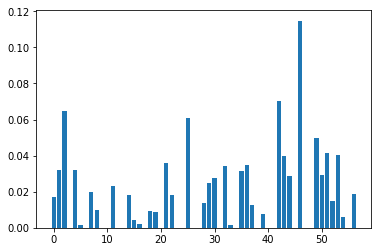

In [52]:
#Manually Plot Feature Importance
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

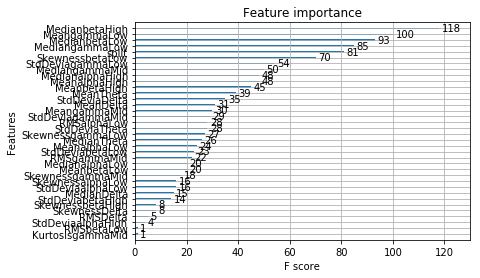

In [53]:
#Using theBuilt-in XGBoost Feature Importance Plot
plot_importance(model)
pyplot.show()

In [54]:
#Feature Selection with XGBoost Feature Importance Scores
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(x_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 62.96%
Thresh=0.000, n=57, Accuracy: 62.96%
Thresh=0.000, n=57, Accuracy: 62.96%
Thresh=0.000, n=57, Accuracy: 62.96%
Thresh=0.000, n=57, Accuracy: 62.96%
Thresh=0.000, n=57, Accuracy: 62.96%
Thresh=0.000, n=57, Accuracy: 62.96%
Thresh=0.000, n=57, Accuracy: 62.96%
Thresh=0.000, n=57, Accuracy: 62.96%
Thresh=0.000, n=57, Accuracy: 62.96%
Thresh=0.000, n=57, Accuracy: 62.96%
Thresh=0.000, n=57, Accuracy: 62.96%
Thresh=0.000, n=57, Accuracy: 62.96%
Thresh=0.000, n=57, Accuracy: 62.96%
Thresh=0.000, n=57, Accuracy: 62.96%
Thresh=0.000, n=57, Accuracy: 62.96%
Thresh=0.000, n=57, Accuracy: 62.96%
Thresh=0.000, n=57, Accuracy: 62.96%
Thresh=0.000, n=57, Accuracy: 62.96%
Thresh=0.000, n=57, Accuracy: 62.96%
Thresh=0.000, n=57, Accuracy: 62.96%
Thresh=0.000, n=57, Accuracy: 62.96%
Thresh=0.002, n=36, Accuracy: 62.96%
Thresh=0.002, n=35, Accuracy: 62.96%
Thresh=0.002, n=34, Accuracy: 62.96%
Thresh=0.005, n=33, Accuracy: 62.96%
Thresh=0.006, n=32, Accuracy: 62.96%
Thresh=0.007, n=31, A